# K-Means alghoritm


Partizione Louvain:
{0: 0, 1: 3, 2: 0, 3: 2, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 4, 10: 2, 11: 4, 12: 2, 13: 3, 14: 0, 15: 1, 16: 4, 17: 0, 18: 0, 19: 4}

Sottografi ottenuti con Louvain:
Sottografo 1:
Nodi: [0, 2, 14, 17, 18]
Archi: [(0, 2), (0, 17), (2, 18), (2, 17), (14, 18), (14, 17)]

Sottografo 2:
Nodi: [15]
Archi: []

Sottografo 3:
Nodi: [10, 3, 12]
Archi: [(10, 3), (3, 12)]

Sottografo 4:
Nodi: [1, 4, 5, 6, 7, 8, 13]
Archi: [(1, 13), (1, 8), (1, 7), (4, 7), (4, 6), (5, 13), (6, 7), (7, 8), (7, 13)]

Sottografo 5:
Nodi: [16, 9, 11, 19]
Archi: [(16, 19), (9, 19), (11, 19)]

Dimensione del multi-cut minimo con Louvain: 10

Partizione k-Means:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]

Sottografi ottenuti con k-Means:
Sottografo 1:
Nodi: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]
Archi: [(0, 3), (0, 2), (0, 17), (0, 8), (1, 13), (1, 8), (1, 7), (2, 18), (2, 12), (2, 17), (2, 6), (2, 9), (3, 17), (3, 10), (3, 11), (3, 12), (4, 7), (4, 6), (5, 13), (6, 7), (6, 17

/home/proffiterol/.local/lib/python3.10/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


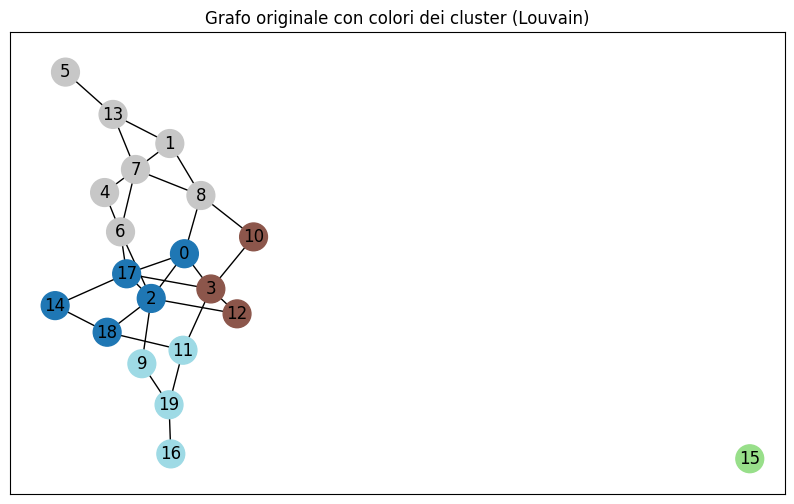

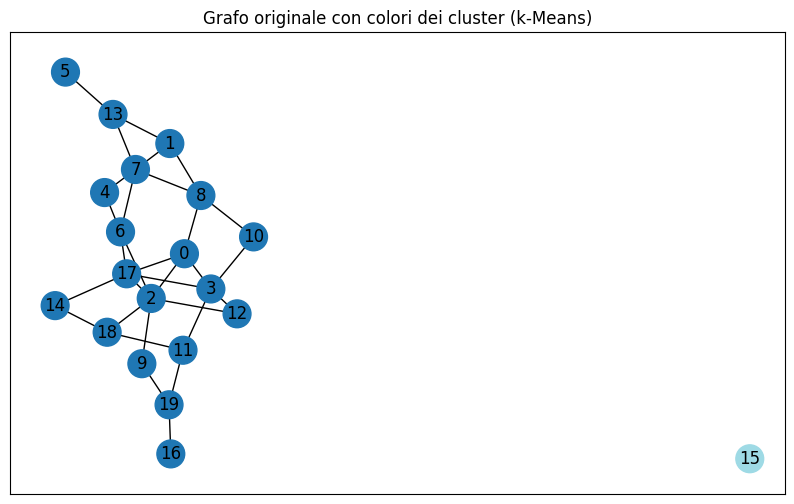

La partizione di k-Means ha il multi-cut minimo.


In [127]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Importa la libreria python-louvain
from sklearn.cluster import KMeans
import numpy as np

# Creazione del grafo
G = nx.gnm_random_graph(n=20, m=30, seed=42)  # Puoi creare il grafo a tuo piacimento

# Funzione per creare i sottografi a partire da una partizione
def create_subgraphs(graph, partition):
    subgraphs = []
    for cluster_idx in set(partition.values()):
        nodes_in_cluster = [node for node, cluster_label in partition.items() if cluster_label == cluster_idx]
        subgraph = graph.subgraph(nodes_in_cluster)
        subgraphs.append(subgraph)
    return subgraphs

# Esegui il clustering utilizzando Louvain
partition_louvain = community.best_partition(G)

# Numero di sottoinsiemi desiderati (puoi modificare questo valore a tuo piacimento)
k = 3

# Creazione dei sottografi dalla partizione di Louvain
subgraphs_louvain = create_subgraphs(G, partition_louvain)

# Calcolo della dimensione del multi-cut minimo per Louvain
min_multi_cut_louvain = sum(1 for edge in G.edges() if partition_louvain[edge[0]] != partition_louvain[edge[1]])

# Calcolo della grandezza del cluster per ogni nodo
cluster_sizes = [len(set(nx.node_connected_component(G, node))) for node in G.nodes()]
# Trasforma la lista di grandezze del cluster in una matrice di feature
X = np.array(cluster_sizes).reshape(-1, 1)

# Applica l'algoritmo k-Means per ottenere la partizione
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

labels_kmeans = kmeans.fit_predict(X)

# Creazione dei sottografi dalla partizione di k-Means
subgraphs_kmeans = create_subgraphs(G, {node: label for node, label in enumerate(labels_kmeans)})

# Calcolo della dimensione del multi-cut minimo per k-Means
min_multi_cut_kmeans = sum(1 for edge in G.edges() if labels_kmeans[edge[0]] != labels_kmeans[edge[1]])

# Stampa dell'output: partizione e sottografi ottenuti con Louvain
print("Partizione Louvain:")
print(partition_louvain)

print("\nSottografi ottenuti con Louvain:")
for idx, subgraph in enumerate(subgraphs_louvain, start=1):
    print(f"Sottografo {idx}:")
    print("Nodi:", list(subgraph.nodes()))
    print("Archi:", list(subgraph.edges()))
    print()

print("Dimensione del multi-cut minimo con Louvain:", min_multi_cut_louvain)

# Stampa dell'output: partizione e sottografi ottenuti con k-Means
print("\nPartizione k-Means:")
print(labels_kmeans)

print("\nSottografi ottenuti con k-Means:")
for idx, subgraph in enumerate(subgraphs_kmeans, start=1):
    print(f"Sottografo {idx}:")
    print("Nodi:", list(subgraph.nodes()))
    print("Archi:", list(subgraph.edges()))
    print()

print("Dimensione del multi-cut minimo con k-Means:", min_multi_cut_kmeans)

# Visualizzazione del grafo originale
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color=list(partition_louvain.values()), cmap=plt.cm.tab20, node_size=400)
plt.title("Grafo originale con colori dei cluster (Louvain)")
plt.show()

plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color=labels_kmeans, cmap=plt.cm.tab20, node_size=400)
plt.title("Grafo originale con colori dei cluster (k-Means)")
plt.show()

# Scegli la partizione con il valore minimo del multi-cut
if min_multi_cut_louvain <= min_multi_cut_kmeans:
    print("La partizione di Louvain ha il multi-cut minimo.")
    chosen_partition = partition_louvain
else:
    print("La partizione di k-Means ha il multi-cut minimo.")
    chosen_partition = {node: label for node, label in enumerate(labels_kmeans)}

# Utilizza chosen_partition per lavorare con la partizione scelta.


Partizione:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]

Sottografi ottenuti:
Sottografo 1:
Nodi: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]
Archi: [(0, 3), (0, 2), (0, 17), (0, 8), (1, 13), (1, 8), (1, 7), (2, 18), (2, 12), (2, 17), (2, 6), (2, 9), (3, 17), (3, 10), (3, 11), (3, 12), (4, 7), (4, 6), (5, 13), (6, 7), (6, 17), (7, 8), (7, 13), (8, 10), (9, 19), (11, 19), (11, 18), (14, 18), (14, 17), (16, 19)]

Sottografo 2:
Nodi: [15]
Archi: []

Sottografo 3:
Nodi: []
Archi: []

Dimensione del multi-cut minimo: 0
Coefficient of Silhouette: 0.95


/home/proffiterol/.local/lib/python3.10/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


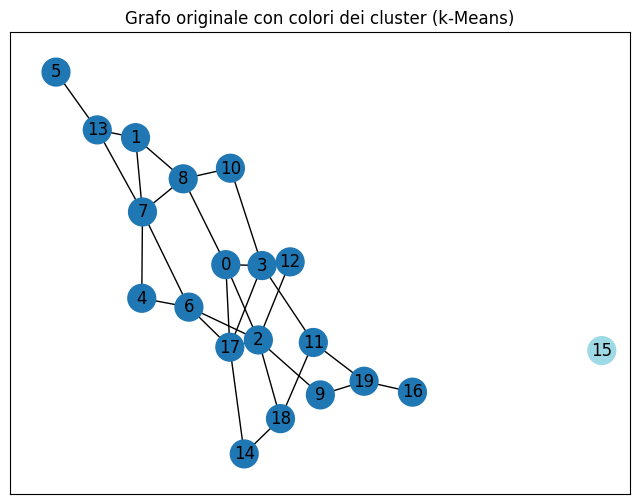

In [128]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Importa la libreria python-louvain
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Creazione del grafo
G = nx.gnm_random_graph(n=20, m=30, seed=42)  # Puoi creare il grafo a tuo piacimento

# Calcolo della grandezza del cluster per ogni nodo
cluster_sizes = [len(set(nx.node_connected_component(G, node))) for node in G.nodes()]
# Trasforma la lista di grandezze del cluster in una matrice di feature
X = np.array(cluster_sizes).reshape(-1, 1)

# Numero di cluster desiderati (puoi modificare questo valore a tuo piacimento)
k = 3

# Applica l'algoritmo k-Means per ottenere la partizione
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Calcolo della dimensione del multi-cut minimo
min_multi_cut_size = 0
for edge in G.edges():
    u, v = edge
    if labels[u] != labels[v]:
        min_multi_cut_size += 1

# Stampa dell'output: partizione e sottografi ottenuti
print("Partizione:")
print(labels)

print("\nSottografi ottenuti:")
subgraphs = [G.subgraph([node for node, label in enumerate(labels) if label == cluster_idx]) for cluster_idx in range(k)]
for idx, subgraph in enumerate(subgraphs, start=1):
    print(f"Sottografo {idx}:")
    print("Nodi:", list(subgraph.nodes()))
    print("Archi:", list(subgraph.edges()))
    print()

print("Dimensione del multi-cut minimo:", min_multi_cut_size)

# Calcolo del coefficiente di silhouette per valutare l'efficacia della partizione
silhouette_avg = silhouette_score(X, labels)
print("Coefficient of Silhouette:", silhouette_avg)

# Visualizzazione del grafo originale
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color=labels, cmap=plt.cm.tab20, node_size=400)
plt.title("Grafo originale con colori dei cluster (k-Means)")
plt.show()


Multi-cut minimo con k-Means: 2


/home/proffiterol/.local/lib/python3.10/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


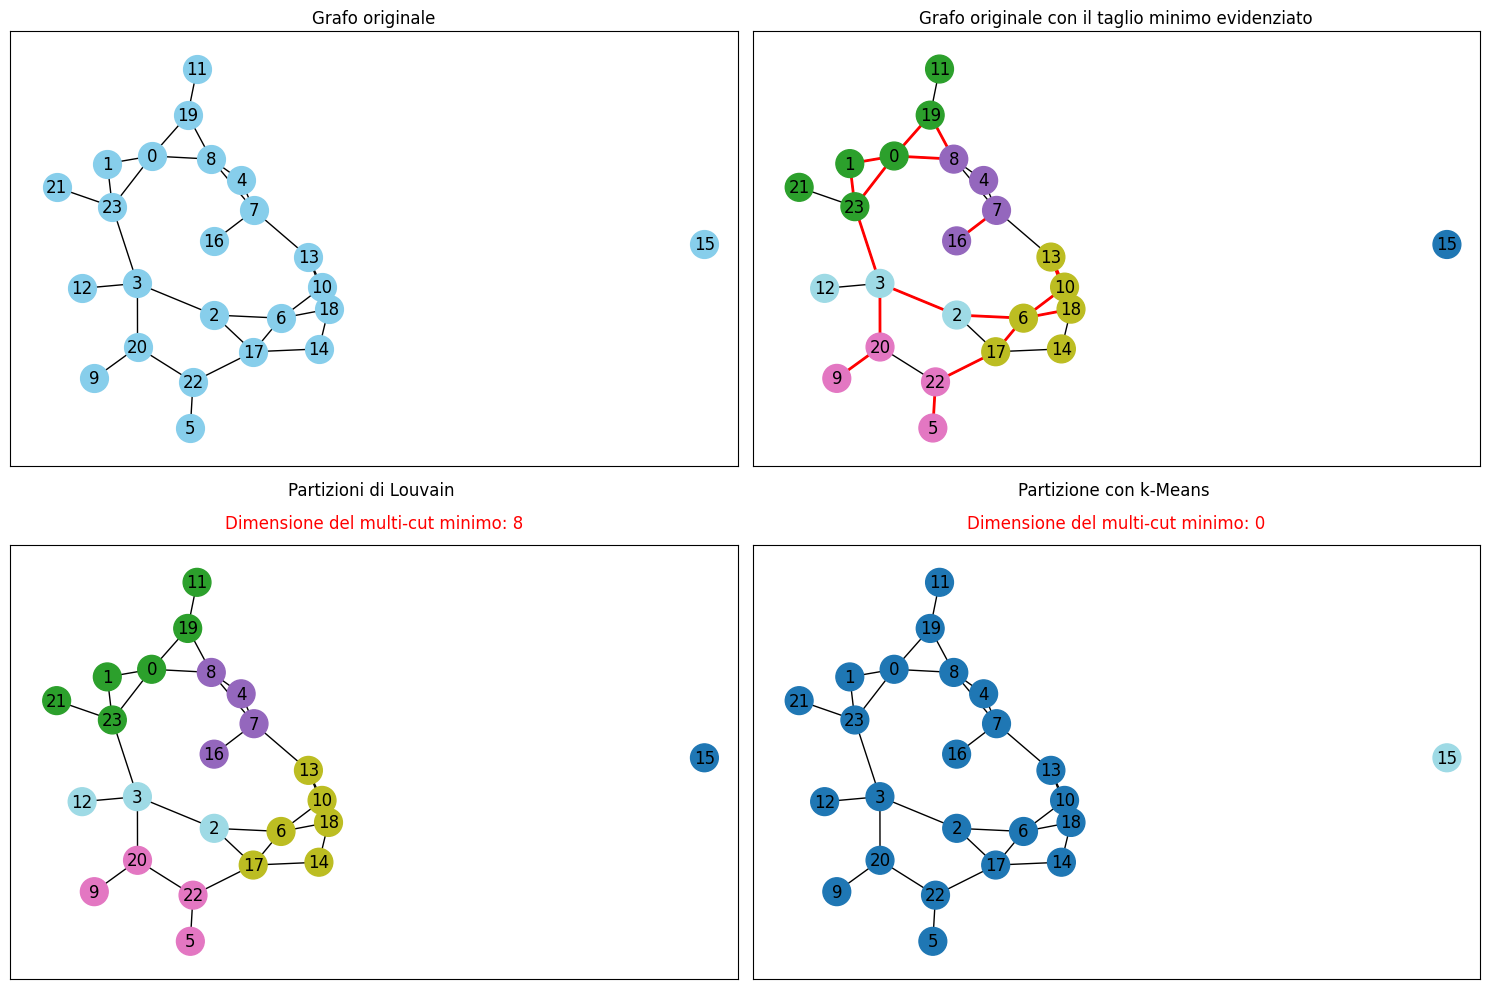

Dimensione del multi-cut minimo con Louvain: 8
Dimensione del multi-cut minimo con k-Means: 0


In [129]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Importa la libreria python-louvain
from sklearn.cluster import KMeans

# Creazione del grafo

G = nx.gnm_random_graph(n=24, m=30, seed=42)  # Puoi creare il grafo a tuo piacimento
# G = nx.cycle_graph(10)

# Imposta la capacità di tutti gli archi a 1
for u, v in G.edges():
    G.edges[u, v]['capacity'] = 1


# Funzione per creare i sottografi a partire da una partizione
def create_subgraphs(graph, partition):
    subgraphs = []
    for cluster_idx in set(partition.values()):
        nodes_in_cluster = [node for node, cluster_label in partition.items() if cluster_label == cluster_idx]
        subgraph = graph.subgraph(nodes_in_cluster)
        subgraphs.append(subgraph)
    return subgraphs


# Calcolo della dimensione del multi-cut minimo con Louvain
min_multi_cut_size_louvain = 0
min_cut_edges_louvain = []

# Calcolo della dimensione del multi-cut minimo con Louvain
min_multi_cut_size_louvain = 0
min_cut_edges_louvain = []
for edge in G.edges():
    u, v = edge
    if partition_louvain.get(u) != partition_louvain.get(v):
        min_multi_cut_size_louvain += 1
        min_cut_edges_louvain.append(edge)


# Esegui il clustering utilizzando Louvain
partition_louvain = community.best_partition(G)

# Numero di sottoinsiemi desiderati (puoi modificare questo valore a tuo piacimento)
k_louvain = len(set(partition_louvain.values()))

# Creazione dei sottografi dalla partizione di Louvain
subgraphs_louvain = create_subgraphs(G, partition_louvain)

# Calcolo della dimensione del multi-cut minimo con Louvain
min_multi_cut_size_louvain = 0
for edge in G.edges():
    u, v = edge
    if partition_louvain[u] != partition_louvain[v]:
        min_multi_cut_size_louvain += 1

# Calcolo della grandezza del cluster per ogni nodo
cluster_sizes = [len(set(nx.node_connected_component(G, node))) for node in G.nodes()]
# Trasforma la lista di grandezze del cluster in una matrice di feature
X = np.array(cluster_sizes).reshape(-1, 1)

# Numero di cluster desiderati (puoi modificare questo valore a tuo piacimento)
k_kmeans = 3

# Applica l'algoritmo k-Means per ottenere la partizione
""" kmeans = KMeans(n_clusters=k_kmeans, random_state=42, n_init=50)  # Aumentato il numero di tentativi iniziali
labels_kmeans = kmeans.fit_predict(X) """

# Calcolo della partizione con k-Means
kmeans = KMeans(n_clusters=k_kmeans, random_state=42, n_init=50)
labels_kmeans = kmeans.fit_predict(X)

# Creazione del grafo con la partizione di k-Means
G_kmeans = G.copy()
for node, label in enumerate(labels_kmeans):
    G_kmeans.nodes[node]['cluster_label'] = label

# Scegli i nodi sorgente e destinazione per l'algoritmo Max-Flow Min-Cut
source_node_kmeans = 0
target_node_kmeans = 1  # Puoi scegliere altri nodi se desideri

# Troviamo il taglio minimo utilizzando l'algoritmo Max-Flow Min-Cut
cut_value_kmeans, (set_source_kmeans, set_target_kmeans) = nx.minimum_cut(G_kmeans, source_node_kmeans, target_node_kmeans)

# Visualizza il multi-cut minimo per k-Means
print("Multi-cut minimo con k-Means:", cut_value_kmeans)


# Calcolo della dimensione del multi-cut minimo con k-Means
min_multi_cut_size_kmeans = 0
for edge in G.edges():
    u, v = edge
    if labels_kmeans[u] != labels_kmeans[v]:
        min_multi_cut_size_kmeans += 1

# Visualizzazione del grafo originale, partizioni di Louvain e partizione con k-Means
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 10))

# Grafo originale
plt.subplot(2, 2, 1)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=400)
plt.title("Grafo originale")

# Visualizzazione del grafo originale con il taglio minimo evidenziato in rosso
plt.subplot(2, 2, 2)
nx.draw_networkx(G, pos, with_labels=True, node_color=list(partition_louvain.values()), cmap=plt.cm.tab20, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=min_cut_edges_louvain, edge_color='red', width=2)
plt.title("Grafo originale con il taglio minimo evidenziato")



# Partizioni di Louvain
plt.subplot(2, 2, 3)
nx.draw_networkx(G, pos, with_labels=True, node_color=list(partition_louvain.values()), cmap=plt.cm.tab20, node_size=400)
plt.title("Partizioni di Louvain \n \n")
# Aggiungi l'etichetta per il taglio minimo
plt.text(0.5, 1.05, f"Dimensione del multi-cut minimo: {min_multi_cut_size_louvain}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')

# Partizione con k-Means
plt.subplot(2, 2, 4)
nx.draw_networkx(G, pos, with_labels=True, node_color=labels_kmeans, cmap=plt.cm.tab20, node_size=400)
plt.title("Partizione con k-Means \n \n")
# Aggiungi l'etichetta per il taglio minimo
plt.text(0.5, 1.05, f"Dimensione del multi-cut minimo: {min_multi_cut_size_kmeans}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Stampa della dimensione del multi-cut minimo
print("Dimensione del multi-cut minimo con Louvain:", min_multi_cut_size_louvain)
print("Dimensione del multi-cut minimo con k-Means:", min_multi_cut_size_kmeans)


Il motivo per cui ottieni una dimensione del multi-cut minimo di 0 con k-Means è perché il grafo che hai creato utilizzando l'algoritmo k-Means è completamente connesso. Questo significa che tutti i nodi del grafo appartengono allo stesso cluster e non ci sono archi tra i cluster, quindi non esiste alcun taglio tra i cluster.

Il clustering ottenuto tramite l'algoritmo k-Means si basa sulla grandezza del cluster di ciascun nodo. Poiché il grafo è completamente connesso, tutti i nodi fanno parte dello stesso cluster (ovvero il grafo stesso è un cluster) e quindi non ci sono tagli multipli tra i cluster.

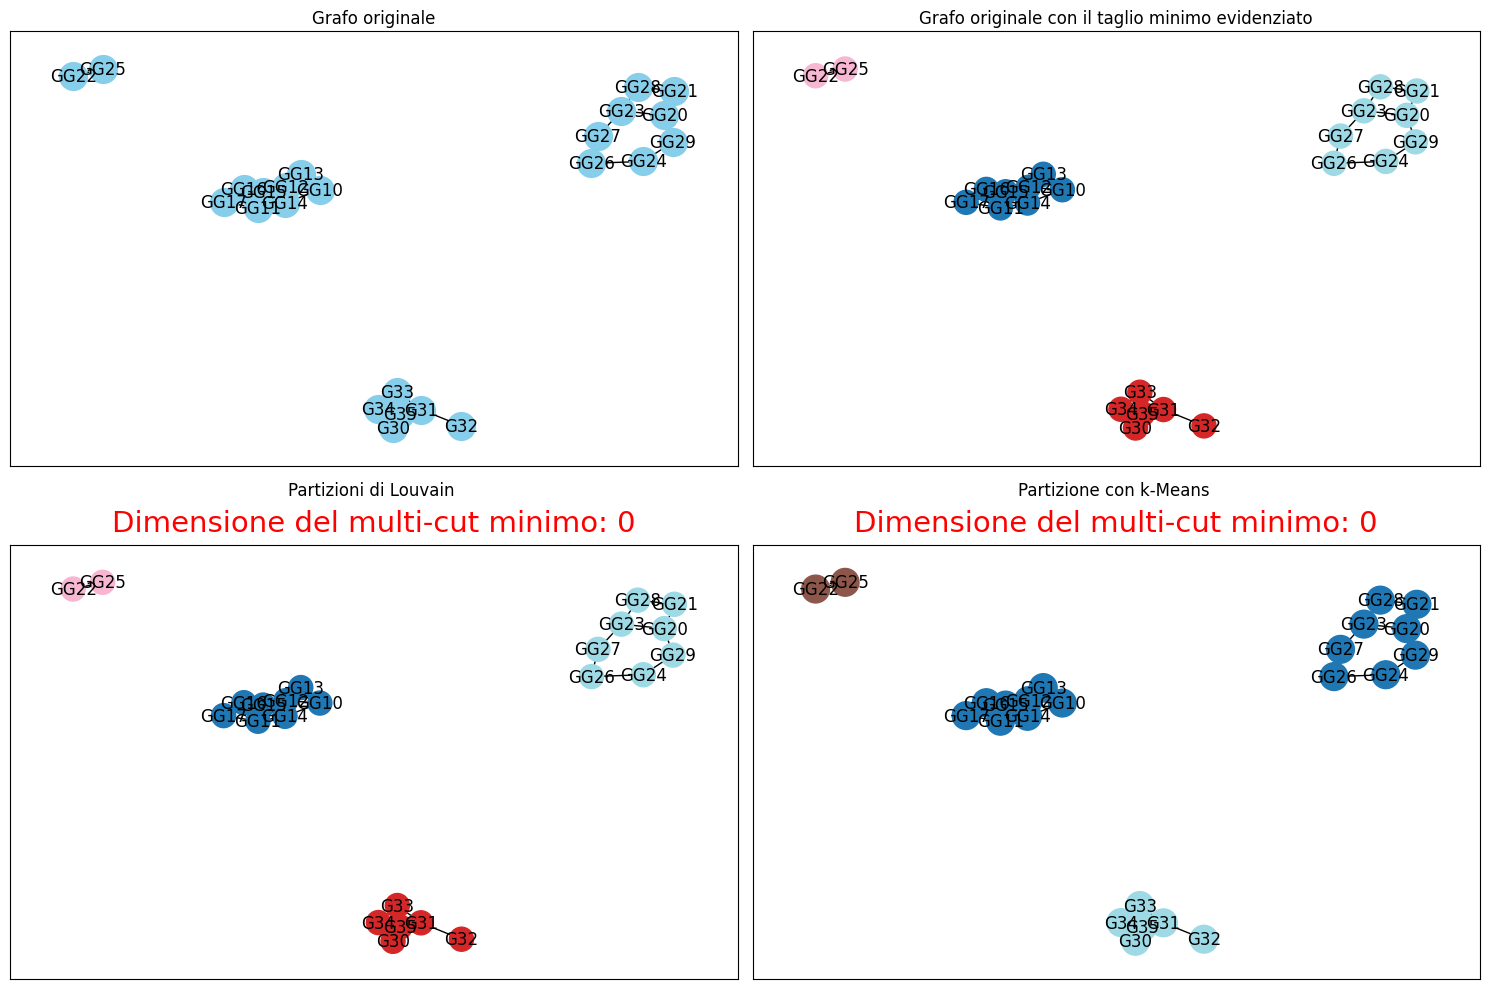

Dimensione del multi-cut minimo con Louvain: 0
Dimensione del multi-cut minimo con k-Means: 0


In [130]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Importa la libreria python-louvain
import numpy as np
from sklearn.cluster import KMeans

# Creazione di 3 componenti connesse
G1 = nx.erdos_renyi_graph(n=8, p=0.4, seed=42)
G2 = nx.erdos_renyi_graph(n=10, p=0.3, seed=43)
G3 = nx.erdos_renyi_graph(n=6, p=0.5, seed=44)

# Aggiungi un attributo per identificare la componente connessa di ciascun grafo
for node in G1.nodes():
    G1.nodes[node]['component'] = 1
for node in G2.nodes():
    G2.nodes[node]['component'] = 2
for node in G3.nodes():
    G3.nodes[node]['component'] = 3

# Unione dei tre sottografi per formare il grafo finale
G = nx.union(G1, G2, rename=('G1', 'G2'))
G = nx.union(G, G3, rename=('G', 'G3'))

# Esegui il clustering utilizzando Louvain
partition_louvain = community.best_partition(G)

# Calcolo della dimensione del multi-cut minimo con Louvain
min_multi_cut_size_louvain = 0
min_cut_edges_louvain = []
for edge in G.edges():
    u, v = edge
    if partition_louvain[u] != partition_louvain[v]:
        min_multi_cut_size_louvain += 1
        min_cut_edges_louvain.append(edge)

# Calcolo della grandezza del cluster per ogni nodo
cluster_sizes = [len(set(nx.node_connected_component(G, node))) for node in G.nodes()]
# Trasforma la lista di grandezze del cluster in una matrice di feature
X = np.array(cluster_sizes).reshape(-1, 1)

# Numero di cluster desiderati (puoi modificare questo valore a tuo piacimento)
k_kmeans = 3

# Applica l'algoritmo k-Means per ottenere la partizione
kmeans = KMeans(n_clusters=k_kmeans, random_state=42, n_init=50)
labels_kmeans = kmeans.fit_predict(X)

# Creiamo un dizionario per mappare le etichette dei nodi del grafo a interi
node_labels_map = {node: idx for idx, node in enumerate(G.nodes())}

# Assegna l'etichetta del cluster a ciascun nodo del grafo utilizzando il componente come indice
for node in G.nodes():
    component = G.nodes[node]['component']
    G.nodes[node]['cluster_label'] = labels_kmeans[node_labels_map[node]]

# Calcolo della dimensione del multi-cut minimo con k-Means
min_multi_cut_size_kmeans = 0
for edge in G.edges():
    u, v = edge
    if G.nodes[u]['cluster_label'] != G.nodes[v]['cluster_label']:
        min_multi_cut_size_kmeans += 1

# Visualizzazione del grafo originale, partizioni di Louvain e partizione con k-Means
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 10))

# Grafo originale
plt.subplot(2, 2, 1)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=400)
plt.title("Grafo originale")

# Visualizzazione del grafo originale con il taglio minimo evidenziato in rosso
plt.subplot(2, 2, 2)
nx.draw_networkx(G, pos, with_labels=True, node_color=list(partition_louvain.values()), cmap=plt.cm.tab20, node_size=300)
nx.draw_networkx_edges(G, pos, edgelist=min_cut_edges_louvain, edge_color='red', width=2)
plt.title("Grafo originale con il taglio minimo evidenziato")

# Partizioni di Louvain
plt.subplot(2, 2, 3)
nx.draw_networkx(G, pos, with_labels=True, node_color=list(partition_louvain.values()), cmap=plt.cm.tab20, node_size=300)
plt.title("Partizioni di Louvain \n \n")
# Aggiungi l'etichetta per il taglio minimo
plt.text(0.5, 1.05, f"Dimensione del multi-cut minimo: {min_multi_cut_size_louvain}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')

# Partizione con k-Means
plt.subplot(2, 2, 4)
nx.draw_networkx(G, pos, with_labels=True, node_color=labels_kmeans, cmap=plt.cm.tab20, node_size=400)
plt.title("Partizione con k-Means \n \n")
# Aggiungi l'etichetta per il taglio minimo
plt.text(0.5, 1.05, f"Dimensione del multi-cut minimo: {min_multi_cut_size_kmeans}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Stampa della dimensione del multi-cut minimo
print("Dimensione del multi-cut minimo con Louvain:", min_multi_cut_size_louvain)
print("Dimensione del multi-cut minimo con k-Means:", min_multi_cut_size_kmeans)
